# 2D Finite Differences 

## Code Deliverable

In [21]:
import numpy as np
from scipy import sparse

def finiteDifference2D(f, ua, ub, uc, ud, N):
    
    h = 1/(N+1)
    
    #define 1D meshpoints 
    x = np.linspace(0,1,N+2)
    y = np.linspace(0,1,N+2)
    
    x = x[1:-1]
    y = y[1:-1]
    
    #create 2d meshgrid from 1d x and y coords
    X, Y = np.meshgrid(x, y)
    
    #compute f(X,Y)
    func = f(X, Y)*(-h**2)
    func = func.flatten().T
    
    #bottom
    func[0:N] = func[0:N] - ua
    #top
    func[N**2 - N + 1 : N**2] = func[N**2 -N + 1 : N**2] - ud
    #right side
    func[np.arange(N - 1, N**2, N)] = func[np.arange(N - 1, N**2, N)] - uc(x)
    #left side
    func[np.arange(0 , (N**2 - N + 1),  N)] = func[np.arange(0 , (N**2 - N + 1),  N)] - ub(x)
    
    #define vectors for main diagonal and off diagonals 
    main_diag = 2*np.ones((N, 1)).ravel()
    off_diag = -1*np.ones((N, 1)).ravel()

    #create sparse matrix 
    diagonals = [main_diag, off_diag, off_diag]
    S = sparse.diags(diagonals, [0,-1,1], shape=(N,N)).toarray()
    
    #create identity matrix 
    I = np.identity(N)
    
    #create kron matrix 
    L = np.kron(S, I) + np.kron(I, S)
    
    #solve function 
    U = np.linalg.solve(L, func)
    
    #return approximations 
    return U, X, Y

In [22]:
#define exact and f function 
exact = lambda x, y: -(np.sin(np.pi*x)*np.cos(np.pi*y))
f = lambda x, y: 2*np.pi**2*np.sin(np.pi*x)*np.cos(np.pi*y)

#boundary conditions
ua = 0
ub = lambda x: np.sin(np.pi*x)
uc = lambda x: -np.sin(np.pi*x)
ud = 0

#call 2d solver 
U, X, Y = finiteDifference2D(f, ua, ub, uc, ud, 4)

[0.21232319 0.80764277 1.09447026 0.96324732]
[-0.96324732 -0.60751038 -0.60751038  0.21232319 -1.09447026 -0.23204832
 -0.23204832  0.80764277 -0.80764277  0.23204832  0.23204832  1.09447026
 -0.21232319  0.60751038  0.60751038  0.96324732]


In [26]:
def finiteDiffConvergence2D(f, ua, ub, uc, ud):
    
    """
    This function performs a convergence study 
    """

    #array of different values of N
    N = [4, 8, 16, 32, 64]

    #initialize empty array to hold error
    x = []

    #loop through N values in Narray 
    for h in N:
        #call finite different functions 
        print(h)
        U, X, Y = finiteDifference2D(f, ua, ub, uc, ud, h)
        print(U.shape)
        #find error from approximate value and exact 
        E = U - exact(X,Y).flatten().T
        
        #calculate the l2 and linf norm 
        x.append(np.linalg.norm(E, 2)/h)
        
    print(x)
        
    
    #return norm
    return x, N

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

def plotLoglog(X, NN):
    """
    This function plots a convergence study on the approximated solutions 
    
    Inputs:
        X - l2 norm of approximated solution 
        Y - linf norm of the approximated solution 
        NN - array of N input sizes 
    """
    
    #calculate slope 
    m1 = (np.log(2.18868523/4.36864701))/(np.log(128/64))
    txt = "\nSlope of the log log plot for l_2 norm " + str(round(m1,6))
    
    plt.loglog(NN, X)
    
#     #plot convergence study 
#     fig, ax = plt.subplots(1, 1, figsize=(15,5))
#     ax[0].loglog(NN, X)
#     ax[0].set_xlabel('Step size N')
#     ax[0].set_ylabel(r'$\ell_2$ norm of U_backslash')
#     ax[0].set_title(r'Loglog plot for $\ell_2$ norm', fontsize=18)
#     fig.text(.5, .000005, txt, ha='center', fontsize=13)
    plt.show()

4
[0.21232319 0.80764277 1.09447026 0.96324732]
[-0.96324732 -0.60751038 -0.60751038  0.21232319 -1.09447026 -0.23204832
 -0.23204832  0.80764277 -0.80764277  0.23204832  0.23204832  1.09447026
 -0.21232319  0.60751038  0.60751038  0.96324732]
(16,)
8
[0.26369842 0.57893916 0.82435129 0.97033448 0.99928102 0.90769952
 0.70663606 0.42034186]
[-0.42034186 -0.14719669 -0.19831756 -0.22551841 -0.22551841 -0.19831756
 -0.14719669  0.26369842 -0.70663606 -0.11999584 -0.16166996 -0.18384429
 -0.18384429 -0.16166996 -0.11999584  0.57893916 -0.90769952 -0.07832172
 -0.10552257 -0.11999584 -0.11999584 -0.10552257 -0.07832172  0.82435129
 -0.99928102 -0.02720085 -0.0366476  -0.04167412 -0.04167412 -0.0366476
 -0.02720085  0.97033448 -0.97033448  0.02720085  0.0366476   0.04167412
  0.04167412  0.0366476   0.02720085  0.99928102 -0.82435129  0.07832172
  0.10552257  0.11999584  0.11999584  0.10552257  0.07832172  0.90769952
 -0.57893916  0.11999584  0.16166996  0.18384429  0.18384429  0.16166996
 

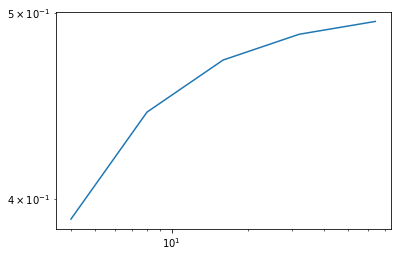

In [28]:
#perform and plot convergence study 
X, NN = finiteDiffConvergence2D(f, ua, ub, uc, ud)
plotLoglog(X, NN)